# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}&appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | bengkulu
Processing Record 3 of Set 1 | dingle
Processing Record 4 of Set 1 | ponta do sol
Processing Record 5 of Set 1 | ostrovnoy
Processing Record 6 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | cabo san lucas
Processing Record 9 of Set 1 | alofi
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | salalah
Processing Record 15 of Set 1 | mahebourg
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | babanusah
City not found. Skipping...
Processing Record 18 of Set 1 | aden
Processing Record 19 of Set 1 | saint-philippe
Processing Record 20 of Set 1 | ilhabela
Processing Record 21 of Set 1 |

Processing Record 36 of Set 4 | mehamn
Processing Record 37 of Set 4 | nuuk
Processing Record 38 of Set 4 | svetlaya
Processing Record 39 of Set 4 | ribeira grande
Processing Record 40 of Set 4 | tasiilaq
Processing Record 41 of Set 4 | tandil
Processing Record 42 of Set 4 | carballo
Processing Record 43 of Set 4 | dunedin
Processing Record 44 of Set 4 | airai
Processing Record 45 of Set 4 | villeneuve-sur-lot
Processing Record 46 of Set 4 | opatija
Processing Record 47 of Set 4 | rudbar
Processing Record 48 of Set 4 | vitim
Processing Record 49 of Set 4 | narsaq
Processing Record 0 of Set 5 | mataram
Processing Record 1 of Set 5 | gigmoto
Processing Record 2 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 4 of Set 5 | touros
Processing Record 5 of Set 5 | kolokani
Processing Record 6 of Set 5 | sanmenxia
Processing Record 7 of Set 5 | acapulco
Processing Record 8 of Set 5 | shahabad
Processing R

Processing Record 24 of Set 8 | san ramon
Processing Record 25 of Set 8 | saint-joseph
Processing Record 26 of Set 8 | myaundzha
Processing Record 27 of Set 8 | torata
Processing Record 28 of Set 8 | college
Processing Record 29 of Set 8 | umm lajj
Processing Record 30 of Set 8 | malayal
Processing Record 31 of Set 8 | markovo
Processing Record 32 of Set 8 | svetlogorsk
Processing Record 33 of Set 8 | leningradskiy
Processing Record 34 of Set 8 | santa maria
Processing Record 35 of Set 8 | kiyasovo
Processing Record 36 of Set 8 | farim
Processing Record 37 of Set 8 | sisimiut
Processing Record 38 of Set 8 | pisco
Processing Record 39 of Set 8 | ayer itam
City not found. Skipping...
Processing Record 40 of Set 8 | viligili
City not found. Skipping...
Processing Record 41 of Set 8 | kargasok
Processing Record 42 of Set 8 | praia da vitoria
Processing Record 43 of Set 8 | ambositra
Processing Record 44 of Set 8 | arona
Processing Record 45 of Set 8 | sanjwal
Processing Record 46 of Set 8 

Processing Record 13 of Set 12 | kamogawa
Processing Record 14 of Set 12 | sinnamary
Processing Record 15 of Set 12 | comodoro rivadavia
Processing Record 16 of Set 12 | olean
Processing Record 17 of Set 12 | omboue
Processing Record 18 of Set 12 | kurchum
Processing Record 19 of Set 12 | mocuba
Processing Record 20 of Set 12 | awbari
Processing Record 21 of Set 12 | novoagansk
Processing Record 22 of Set 12 | barbar
City not found. Skipping...
Processing Record 23 of Set 12 | yumen
Processing Record 24 of Set 12 | tshikapa
Processing Record 25 of Set 12 | ahuimanu
Processing Record 26 of Set 12 | flin flon
Processing Record 27 of Set 12 | aripuana
Processing Record 28 of Set 12 | inhambane
Processing Record 29 of Set 12 | kenai
Processing Record 30 of Set 12 | arlit
Processing Record 31 of Set 12 | hokitika
Processing Record 32 of Set 12 | kyaukse
Processing Record 33 of Set 12 | margate
Processing Record 34 of Set 12 | edgewater
Processing Record 35 of Set 12 | olafsvik
Processing Re

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.1927,168.8643,65.86,95,79,4.61,NZ,1675409659
1,bengkulu,-3.8004,102.2655,84.72,65,98,11.68,ID,1675409660
2,dingle,10.9995,122.6711,80.22,82,100,15.23,PH,1675409661
3,ponta do sol,32.6667,-17.1000,59.63,57,44,4.05,PT,1675409661
4,ostrovnoy,68.0531,39.5131,19.92,87,100,6.82,RU,1675409662


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mataura,-46.1927,168.8643,65.86,95,79,4.61,NZ,1675409659
1,bengkulu,-3.8004,102.2655,84.72,65,98,11.68,ID,1675409660
2,dingle,10.9995,122.6711,80.22,82,100,15.23,PH,1675409661
3,ponta do sol,32.6667,-17.1000,59.63,57,44,4.05,PT,1675409661
4,ostrovnoy,68.0531,39.5131,19.92,87,100,6.82,RU,1675409662


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

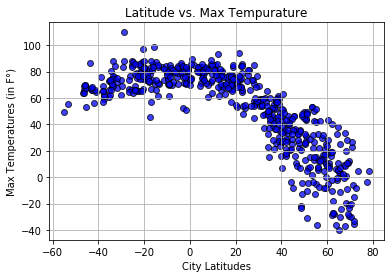

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="blue", edgecolor="black" , alpha=0.75)

# Incorporate the other graph properties
plt.title("Latitude vs. Max Tempurature")
plt.xlabel("City Latitudes")
plt.ylabel("Max Temperatures (in F°)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Lat_Temp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

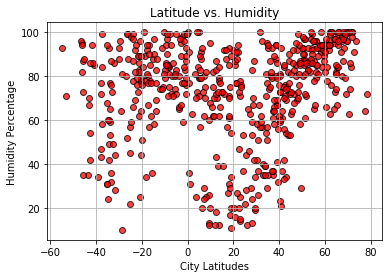

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolors="red", edgecolor="black" , alpha=0.75)

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.xlabel("City Latitudes")
plt.ylabel("Humidity Percentage")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Lat_Hmdty.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

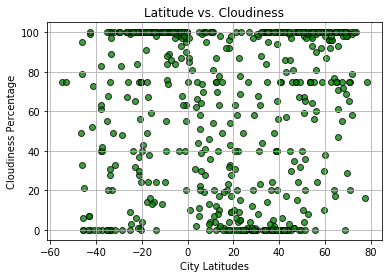

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors="green", edgecolor="black" , alpha=0.75)

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.xlabel("City Latitudes")
plt.ylabel("Cloudiness Percentage")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Lat_Cloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

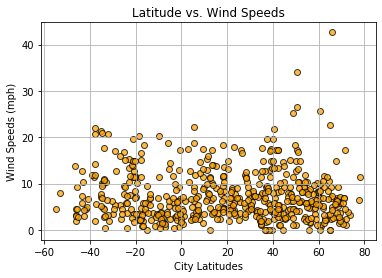

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="orange", edgecolor="black" , alpha=0.75)

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speeds")
plt.xlabel("City Latitudes")
plt.ylabel("Wind Speeds (mph)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Lat_Wind.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

NameError: name 'northern_hemi_df' is not defined

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE